In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

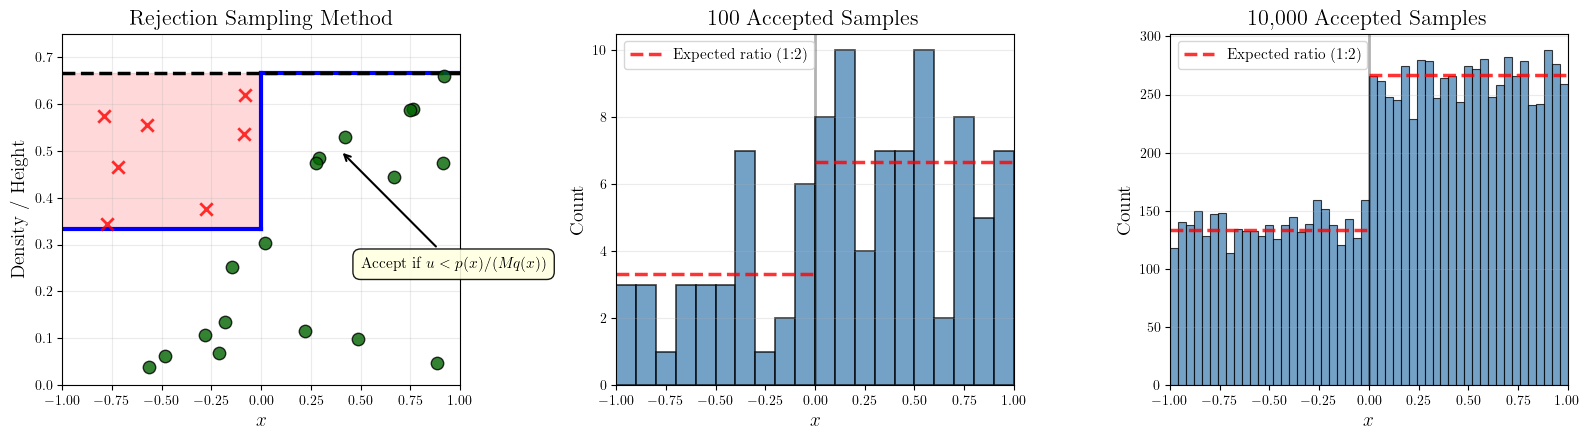


Sample statistics:
100 samples: 32 negative, 68 positive
10,000 samples: 3428 negative, 6572 positive


In [ ]:
np.random.seed(43)

P_target = lambda x: (x < 0) * 1/3 + (x > 0) * 2/3
Q = 0.5  # uniform proposal on [-1, 1]
M = 4/3  # envelope constant
MQ = M * Q

fig, axes = plt.subplots(1, 3, figsize=(16, 4.5))


ax = axes[0]

x_neg = np.linspace(-1, 0, 100)
x_pos = np.linspace(0, 1, 100)
ax.plot(x_neg, np.ones_like(x_neg) * 1/3, 'b-', linewidth=3, label='$p(x)$ (target)')
ax.plot(x_pos, np.ones_like(x_pos) * 2/3, 'b-', linewidth=3)
ax.plot([0, 0], [1/3, 2/3], 'b-', linewidth=3)

ax.axhline(y=MQ, color='black', linestyle='--', linewidth=2.5, 
           label=f'$M q(x) = {MQ:.3f}$ (envelope)', zorder=5)

np.random.seed(44)
n_examples = 25
x_examples = 2 * np.random.rand(n_examples) - 1
u_examples = np.random.rand(n_examples) * MQ
accept_examples = u_examples < P_target(x_examples)

ax.scatter(x_examples[accept_examples], u_examples[accept_examples], 
           c='darkgreen', s=80, marker='o', alpha=0.8, 
           label='Accepted', zorder=10, edgecolors='black', linewidths=1)

ax.scatter(x_examples[~accept_examples], u_examples[~accept_examples], 
           c='red', s=80, marker='x', alpha=0.8, 
           label='Rejected', zorder=10, linewidths=2)

x_fill = np.linspace(-1, 0, 200)
ax.fill_between(x_fill, 1/3, MQ, alpha=0.15, color='red', label='Rejection region')
x_fill = np.linspace(0, 1, 200)
ax.fill_between(x_fill, 2/3, MQ, alpha=0.15, color='red')

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('Density / Height', fontsize=14)
ax.set_title('Rejection Sampling Method', fontsize=16, weight='bold')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 0.75)
# ax.legend(fontsize=11, loc='upper left', framealpha=0.95)
ax.grid(True, alpha=0.25)

ax.annotate('Accept if $u < p(x)/(Mq(x))$', 
            xy=(0.4, 0.5), xytext=(0.5, 0.25),
            fontsize=11, ha='left',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.9),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5))


ax = axes[1]

n_tries = 500
x_prop = 2 * np.random.rand(n_tries) - 1
u = np.random.rand(n_tries)
accept = u < P_target(x_prop) / MQ
x_sample_100 = x_prop[accept][:100]

counts, bins, patches = ax.hist(x_sample_100, bins=20, range=(-1, 1),
                                 edgecolor='black', alpha=0.75, color='steelblue',
                                 linewidth=1.2)

ax.axvline(x=0, color='black', linewidth=2, alpha=0.3)
N = len(x_sample_100)
bin_width = bins[1] - bins[0]
expected_left = N * (1/3) * bin_width
expected_right = N * (2/3) * bin_width
ax.plot([-1, 0], [expected_left, expected_left], 
        'r--', linewidth=2.5, label='Expected ratio (1:2)', alpha=0.8)
ax.plot([0, 1], [expected_right, expected_right], 
        'r--', linewidth=2.5, alpha=0.8)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('100 Accepted Samples', fontsize=16, weight='bold')
ax.set_xlim(-1, 1)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.25, axis='y')

n_neg = np.sum(x_sample_100 < 0)
n_pos = np.sum(x_sample_100 > 0)
# ax.text(0.02, 0.96, f'$x < 0$: {n_neg} ({n_neg/100:.1%})\n$x > 0$: {n_pos} ({n_pos/100:.1%})',
#         transform=ax.transAxes, fontsize=11, verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))


ax = axes[2]

n_tries = 50000
x_prop = 2 * np.random.rand(n_tries) - 1
u = np.random.rand(n_tries)
accept = u < P_target(x_prop) / MQ
x_sample_10k = x_prop[accept][:10000]

counts, bins, patches = ax.hist(x_sample_10k, bins=50, range=(-1, 1),
                                 edgecolor='black', alpha=0.75, color='steelblue',
                                 linewidth=0.8)

ax.axvline(x=0, color='black', linewidth=2, alpha=0.3)
N = len(x_sample_10k)
bin_width = bins[1] - bins[0]
expected_left = N * (1/3) * bin_width
expected_right = N * (2/3) * bin_width
ax.plot([-1, 0], [expected_left, expected_left], 
        'r--', linewidth=2.5, label='Expected ratio (1:2)', alpha=0.8)
ax.plot([0, 1], [expected_right, expected_right], 
        'r--', linewidth=2.5, alpha=0.8)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('10,000 Accepted Samples', fontsize=16, weight='bold')
ax.set_xlim(-1, 1)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.25, axis='y')

n_neg = np.sum(x_sample_10k < 0)
n_pos = np.sum(x_sample_10k > 0)
# ax.text(0.02, 0.96, f'$x < 0$: {n_neg} ({n_neg/10000:.1%})\n$x > 0$: {n_pos} ({n_pos/10000:.1%})',
#         transform=ax.transAxes, fontsize=11, verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('../../../figs/monte_carlo/rejection_convergence.pdf', bbox_inches='tight')
plt.show()

print(f"\nSample statistics:")
print(f"100 samples: {np.sum(x_sample_100 < 0)} negative, {np.sum(x_sample_100 > 0)} positive")
print(f"10,000 samples: {np.sum(x_sample_10k < 0)} negative, {np.sum(x_sample_10k > 0)} positive")